# Load Data

In [1]:
from glob import glob
import os, json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_style("whitegrid")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Experiment 2

In [3]:
fold_list = glob('results/*_pot5_onion5_dish5_*')
print('Num Results:', len(fold_list)) 

data = {"Params": [], "Seed": [], "Fitness": [], "Type": [], "Count":[]}

for directory in fold_list:
    with open(os.path.join(directory, 'parameters.json')) as f:
        obj = json.load(f)
        seed = obj['seed']
        params = '$C$=' + str(obj['room_count'])+ \
                 ' $B_2$='+ str(obj['pot_count']) + '\n' + \
                 '$B_3$='+ str(obj['dish_count'])  + \
                 ' $B_4$='+ str(obj['onion_count'])


        
    with open(os.path.join(directory, 'best_chromosome.json')) as f:
        obj = json.load(f)

        data['Seed'].append(seed)
        data['Params'].append(params)
        data['Fitness'].append(obj['fitness'])        
        data['Type'].append('Rooms')        
        data['Count'].append(obj['room_count'])

        
        data['Seed'].append(seed)
        data['Params'].append(params)
        data['Fitness'].append(obj['fitness'])  
        data['Type'].append('Pot Block')
        data['Count'].append(obj['block_2'])
        
        data['Seed'].append(seed)
        data['Params'].append(params)
        data['Fitness'].append(obj['fitness'])  
        data['Type'].append('Dish Block')
        data['Count'].append(obj['block_3'])
        
        data['Seed'].append(seed)
        data['Params'].append(params)
        data['Fitness'].append(obj['fitness'])  
        data['Type'].append('Onion Block')
        data['Count'].append(obj['block_4'])
        

Num Results: 300


In [4]:
def get_order(x):
    order_dict = {'Rooms': 0, 'Pot Block': 1, 'Onion Block': 3, 'Dish Block': 2}
    return order_dict[x]
df = pd.DataFrame(data)

order_keys = []
for idx, row in df.iterrows():
    order_keys.append(get_order(row.Type))
df['TypeOrder'] = order_keys

df = df.sort_values(by=['Params', 'TypeOrder'])
df

,Params,Seed,Fitness,Type,Count,TypeOrder
104,$C$=1 $B_2$=5\n$B_3$=5 $B_4$=5,60,-1.00,Rooms,1,0
108,$C$=1 $B_2$=5\n$B_3$=5 $B_4$=5,94,-1.00,Rooms,1,0
120,$C$=1 $B_2$=5\n$B_3$=5 $B_4$=5,58,-1.00,Rooms,1,0
132,$C$=1 $B_2$=5\n$B_3$=5 $B_4$=5,93,-1.00,Rooms,1,0
136,$C$=1 $B_2$=5\n$B_3$=5 $B_4$=5,67,-1.00,Rooms,1,0
...,...,...,...,...,...,...
1183,$C$=3 $B_2$=5\n$B_3$=5 $B_4$=5,8,-0.05,Onion Block,5,3
1187,$C$=3 $B_2$=5\n$B_3$=5 $B_4$=5,34,-0.25,Onion Block,6,3
1191,$C$=3 $B_2$=5\n$B_3$=5 $B_4$=5,33,0.00,Onion Block,5,3
1195,$C$=3 $B_2$=5\n$B_3$=5 $B_4$=5,6,0.00,Onion Block,5,3


['', '', '', '//', '//', '//', '//', '//', '//', '//', '//', '//']


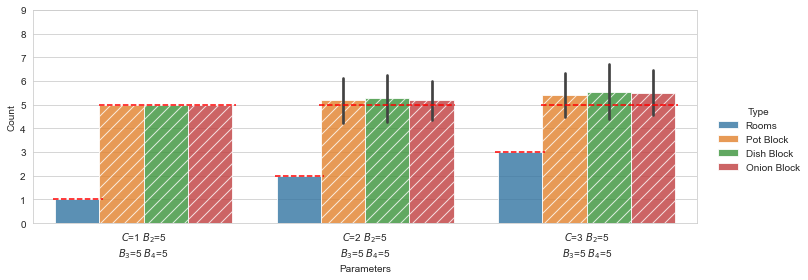

<Figure size 432x288 with 0 Axes>

In [28]:
g = sns.catplot(
    data=df, kind="bar",
    x="Params", y="Count", hue="Type",
    ci="sd", alpha=.8, height=4, aspect=2.5,
    legend_out=True
)
g.despine(left=True)
g.set_axis_labels("Parameters", "Count")

# g.add_legend(label_order=['Rooms', 'Pot Block', 'Onion Block', 'Dish Block'], loc='upper left')
plt.ylim(0, 9)
plt.tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

hatches = [''] * 3 + ['//'] * 9
print(hatches)
# Loop over the bars
for i,thisbar in enumerate(g.ax.patches):
    thisbar.set_hatch(hatches[i])

g.map(plt.axhline, y=1,xmin=0.03, xmax=0.105, ls='--', c='r')
g.map(plt.axhline, y=5,xmin=0.100, xmax=0.305, ls='--', c='r')

g.map(plt.axhline, y=2,xmin=0.365, xmax=0.438, ls='--', c='r')
g.map(plt.axhline, y=5,xmin=0.100+0.330, xmax=0.305+0.330, ls='--', c='r')    


g.map(plt.axhline, y=3,xmin=0.03+0.665, xmax=0.105+0.665, ls='--', c='r')
g.map(plt.axhline, y=5,xmin=0.100+0.665, xmax=0.305+0.665, ls='--', c='r')    

plt.savefig('room.svg', dpi=300)
plt.show()

plt.clf()